In [2]:
""" 1.取得資料
"""
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
"""2.Preprocessing 資料前處理、切分成訓練資料與驗證資料
"""
from sklearn.model_selection import train_test_split

data = iris.data
target = iris.target
x_train , x_test,y_train,y_test = train_test_split(data,target)
# x_train , x_test,y_train,y_test = train_test_split(data,target,test_size=0.2)

print("隨機挑選 ",len(x_train)," 筆資料進行訓練")
print("隨機挑選 ",len(x_test)," 筆資料做最後驗證")

隨機挑選  112  筆資料進行訓練
隨機挑選  38  筆資料做最後驗證


In [5]:
"""3.Training 使用DecisionTree進行訓練
"""

from sklearn import tree
classifier = tree.DecisionTreeClassifier(splitter='random',max_depth=3)
# classifier = tree.DecisionTreeClassifier()
# 訓練
iris_clf = classifier.fit(x_train,y_train)
print(iris_clf.__class__)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [24]:
"""4.Validation 驗證模型
用測試資料評估數學模型的好壞，最簡單的方式就是比較預測資料與原始資料的結果是否相符，依照預測正確的數量來計算正確率(Accuracy)。
"""
# do the validation
y_predict = iris_clf.predict(x_test)
print("原始結果 original result:")
print(y_test)
print("預測結果 predicted result:")
print(y_predict)

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy(正確率) ={:8.3f}%".format(accuracy*100))

原始結果 original result:
[0 1 1 0 2 2 0 0 1 1 2 1 2 1 2 2 0 2 2 2 1 0 1 0 1 2 0 2 2 0 2 0 0 0 0 0 2
 2]
預測結果 predicted result:
[0 1 1 0 2 1 0 0 1 1 2 1 2 1 2 2 0 2 2 2 1 0 1 0 1 2 0 2 2 0 1 0 0 0 0 0 2
 2]
Accuracy(正確率) =  94.737%


|--- sepal length (cm) <= 5.34
|   |--- petal width (cm) <= 0.80
|   |   |--- class: 0
|   |--- petal width (cm) >  0.80
|   |   |--- petal length (cm) <= 4.18
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.18
|   |   |   |--- class: 2
|--- sepal length (cm) >  5.34
|   |--- petal width (cm) <= 0.71
|   |   |--- class: 0
|   |--- petal width (cm) >  0.71
|   |   |--- petal length (cm) <= 4.62
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.62
|   |   |   |--- class: 2



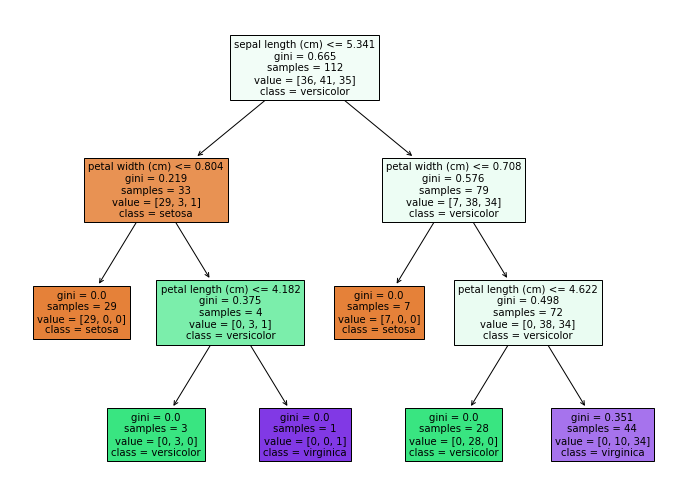

In [31]:
"""5.Plotting 作圖
將計算的結果用圖示來呈現，不同的數學模型有不同的呈現方式。
ex. Decision Tree(決策樹)使用樹狀圖或是文字樹狀圖呈現, SVM使用點狀散布圖來呈現。

"""
from sklearn.tree.export import export_text
# 文字化呈現
print(export_text(iris_clf,feature_names=iris.feature_names))

# plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))

# Decision Tree 特殊方法
tree.plot_tree(iris_clf,filled=True,class_names=iris.target_names,feature_names=iris.feature_names)
plt.show()

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
0.9555555555555556


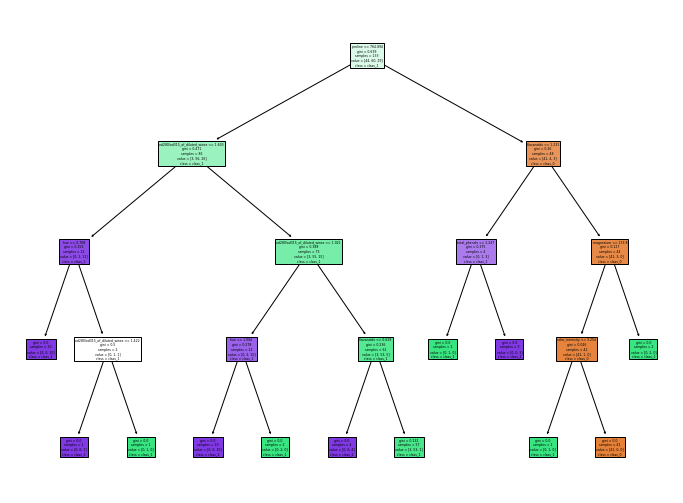

In [48]:
"""練習Lab02-1:使用DecisionTree 預測酒的種類，並畫出樹狀圖。
複習重點1.了解如何使用不同的資料集
複習重點2.了解資料科學領域的步驟
複習重點3.嘗試了解不同分類器不同參數的用途。
"""
from sklearn.datasets import load_wine

wine = load_wine()
data = wine.data
target = wine.target
